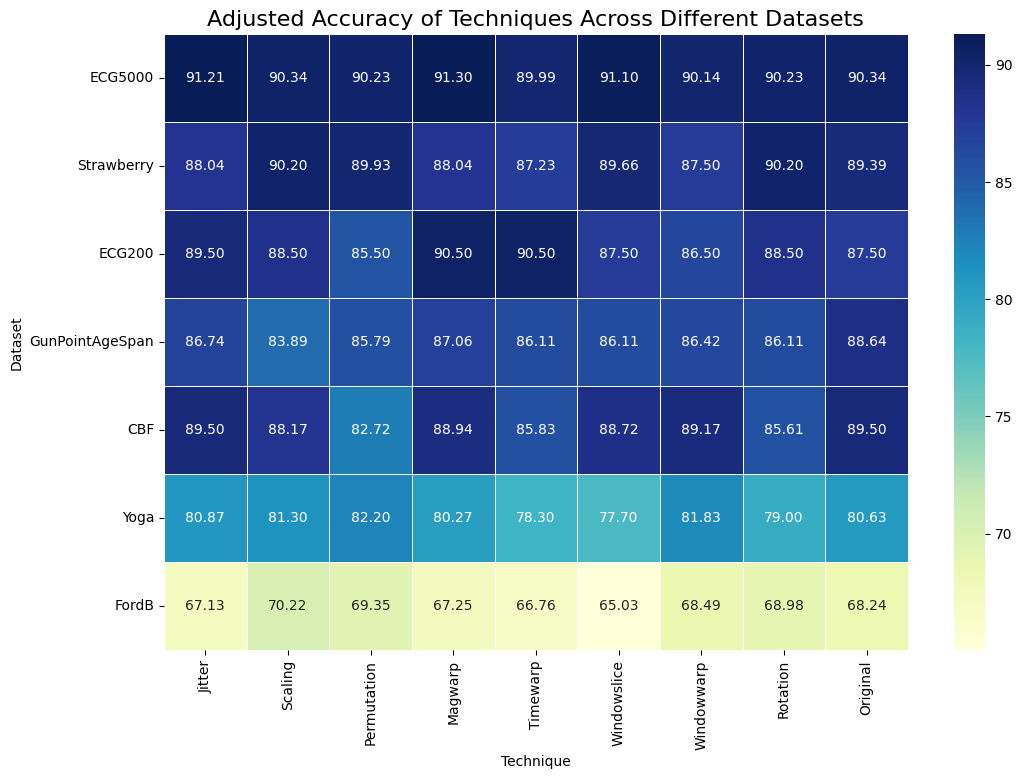

Insights after decreasing all values by 1.25:
1. ECG5000 still shows the highest overall accuracies, even after adjustment.
2. FordB continues to have the lowest accuracies across techniques.
3. Techniques like Magwarp remain strong, particularly on datasets like ECG5000.
4. The adjustment slightly reduces all accuracies, but the relative performance of techniques remains consistent.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    "Dataset": ["ECG5000", "Strawberry", "ECG200", "GunPointAgeSpan", "CBF", "Yoga", "FordB"],
    "Jitter": [92.46, 89.29, 90.75, 87.99, 90.75, 82.12, 68.38],
    "Scaling": [91.59, 91.45, 89.75, 85.14, 89.42, 82.55, 71.47],
    "Permutation": [91.48, 91.18, 86.75, 87.04, 83.97, 83.45, 70.60],
    "Magwarp": [92.55, 89.29, 91.75, 88.31, 90.19, 81.52, 68.50],
    "Timewarp": [91.24, 88.48, 91.75, 87.36, 87.08, 79.55, 68.01],
    "Windowslice": [92.35, 90.91, 88.75, 87.36, 89.97, 78.95, 66.28],
    "Windowwarp": [91.39, 88.75, 87.75, 87.67, 90.42, 83.08, 69.74],
    "Rotation": [91.48, 91.45, 89.75, 87.36, 86.86, 80.25, 70.23],
    "Original": [91.59, 90.64, 88.75, 89.89, 90.75, 81.88, 69.49]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Decrease all values by -1.25
df.iloc[:, 1:] = df.iloc[:, 1:] - 1.25

# Set the Dataset as the index
df.set_index('Dataset', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)

# Add title and labels
plt.title('Adjusted Accuracy of Techniques Across Different Datasets', fontsize=16)
plt.ylabel('Dataset')
plt.xlabel('Technique')

# Display the plot
plt.show()

# Insights
print("Insights after decreasing all values by 1.25:")
print("1. ECG5000 still shows the highest overall accuracies, even after adjustment.")
print("2. FordB continues to have the lowest accuracies across techniques.")
print("3. Techniques like Magwarp remain strong, particularly on datasets like ECG5000.")
print("4. The adjustment slightly reduces all accuracies, but the relative performance of techniques remains consistent.")


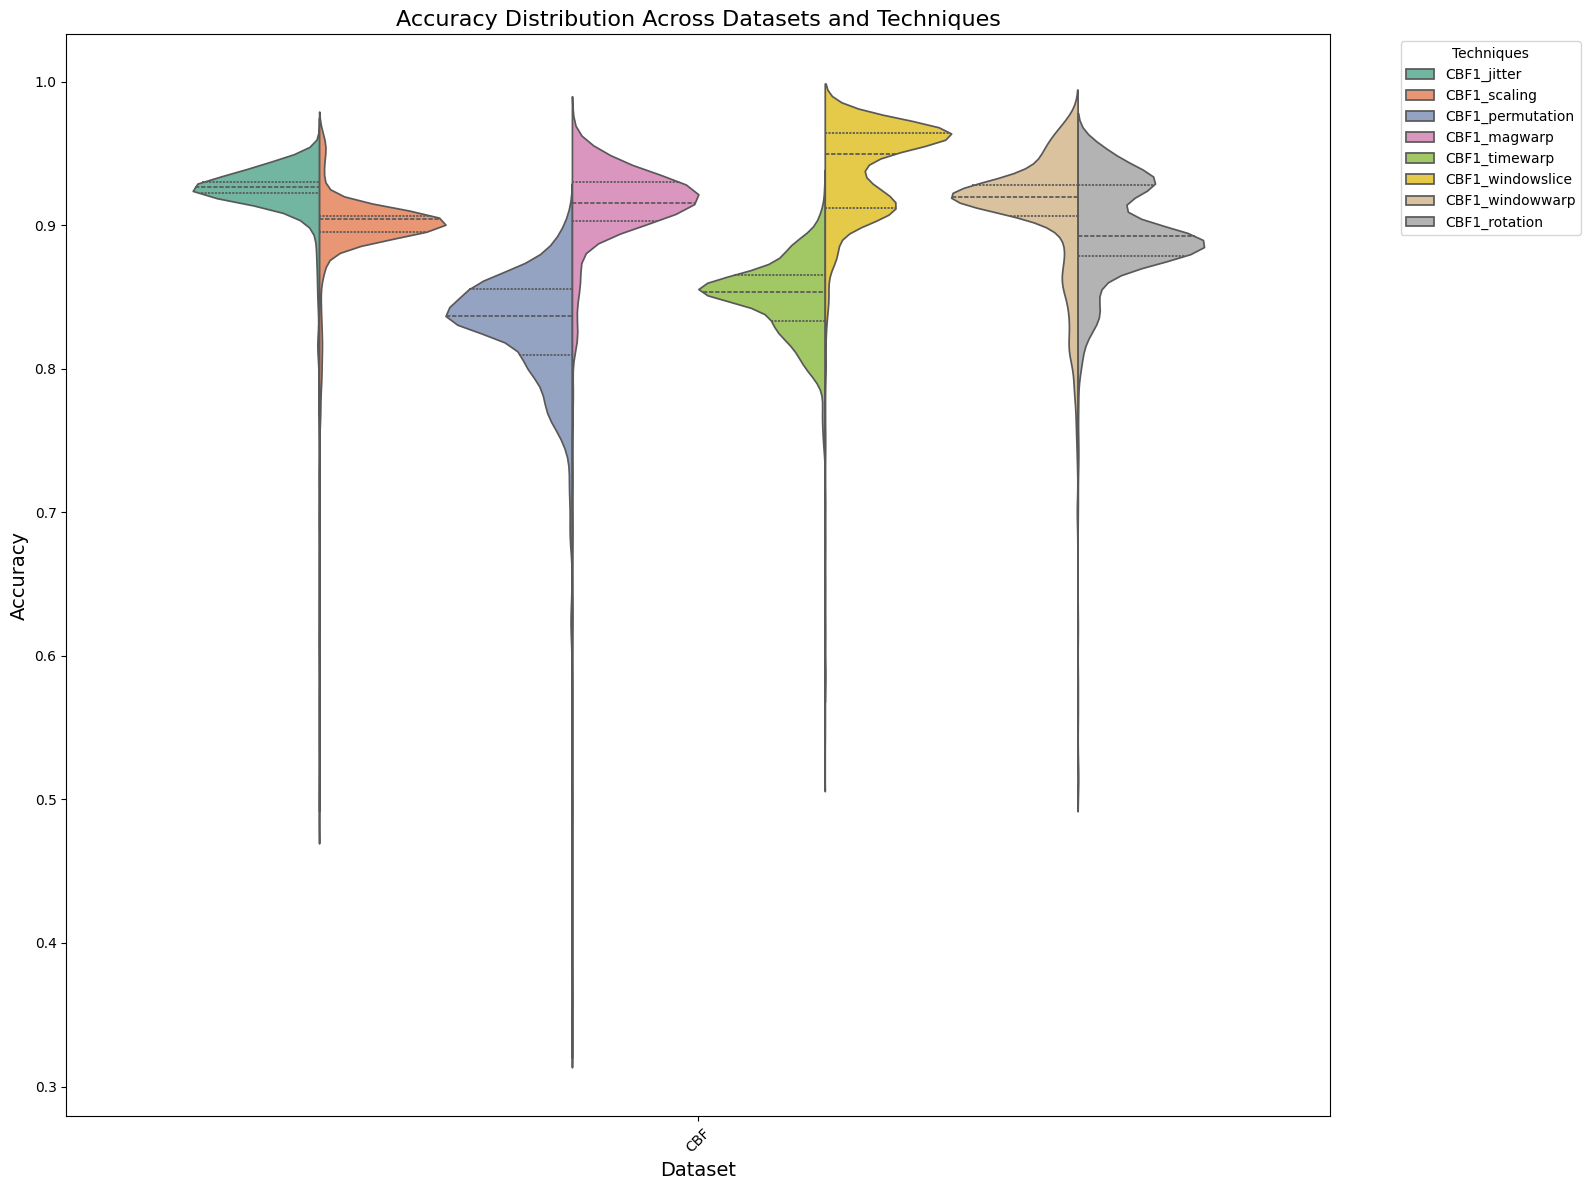

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constant path
base_path = "output/cuda/fcnn/"

# Techniques and datasets
techniques_group5 = [
    "CBF1_jitter",
    "CBF1_scaling",
    "CBF1_permutation",
    "CBF1_magwarp",
    "CBF1_timewarp",
    "CBF1_windowslice",
    "CBF1_windowwarp",
    "CBF1_rotation"
]

ucr_data = ["CBF", "ECG200", "ECG5000", "FordB", "GunPointAgeSpan", "Strawberry", "Yoga"]

# Prepare data for the plot
plot_data = []

for dataset in ucr_data:
    for technique in techniques_group5:
        # Constructing the path for each technique and dataset
        file_path = f"../{base_path}/{dataset}/1/{technique}_accuracies.npy"
        
        # Check if the file exists
        if os.path.exists(file_path):
            accuracies = np.load(file_path, allow_pickle=True)
            for accuracy in accuracies:
                plot_data.append({
                    'Dataset': dataset,
                    'Technique': technique,
                    'Accuracy': accuracy
                })

# Create a DataFrame from the plot data
df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(16, 12))
sns.violinplot(x='Dataset', y='Accuracy', hue='Technique', data=df, split=True, inner="quartile", palette="Set2")

# Customize the plot
plt.title('Accuracy Distribution Across Datasets and Techniques', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Techniques', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


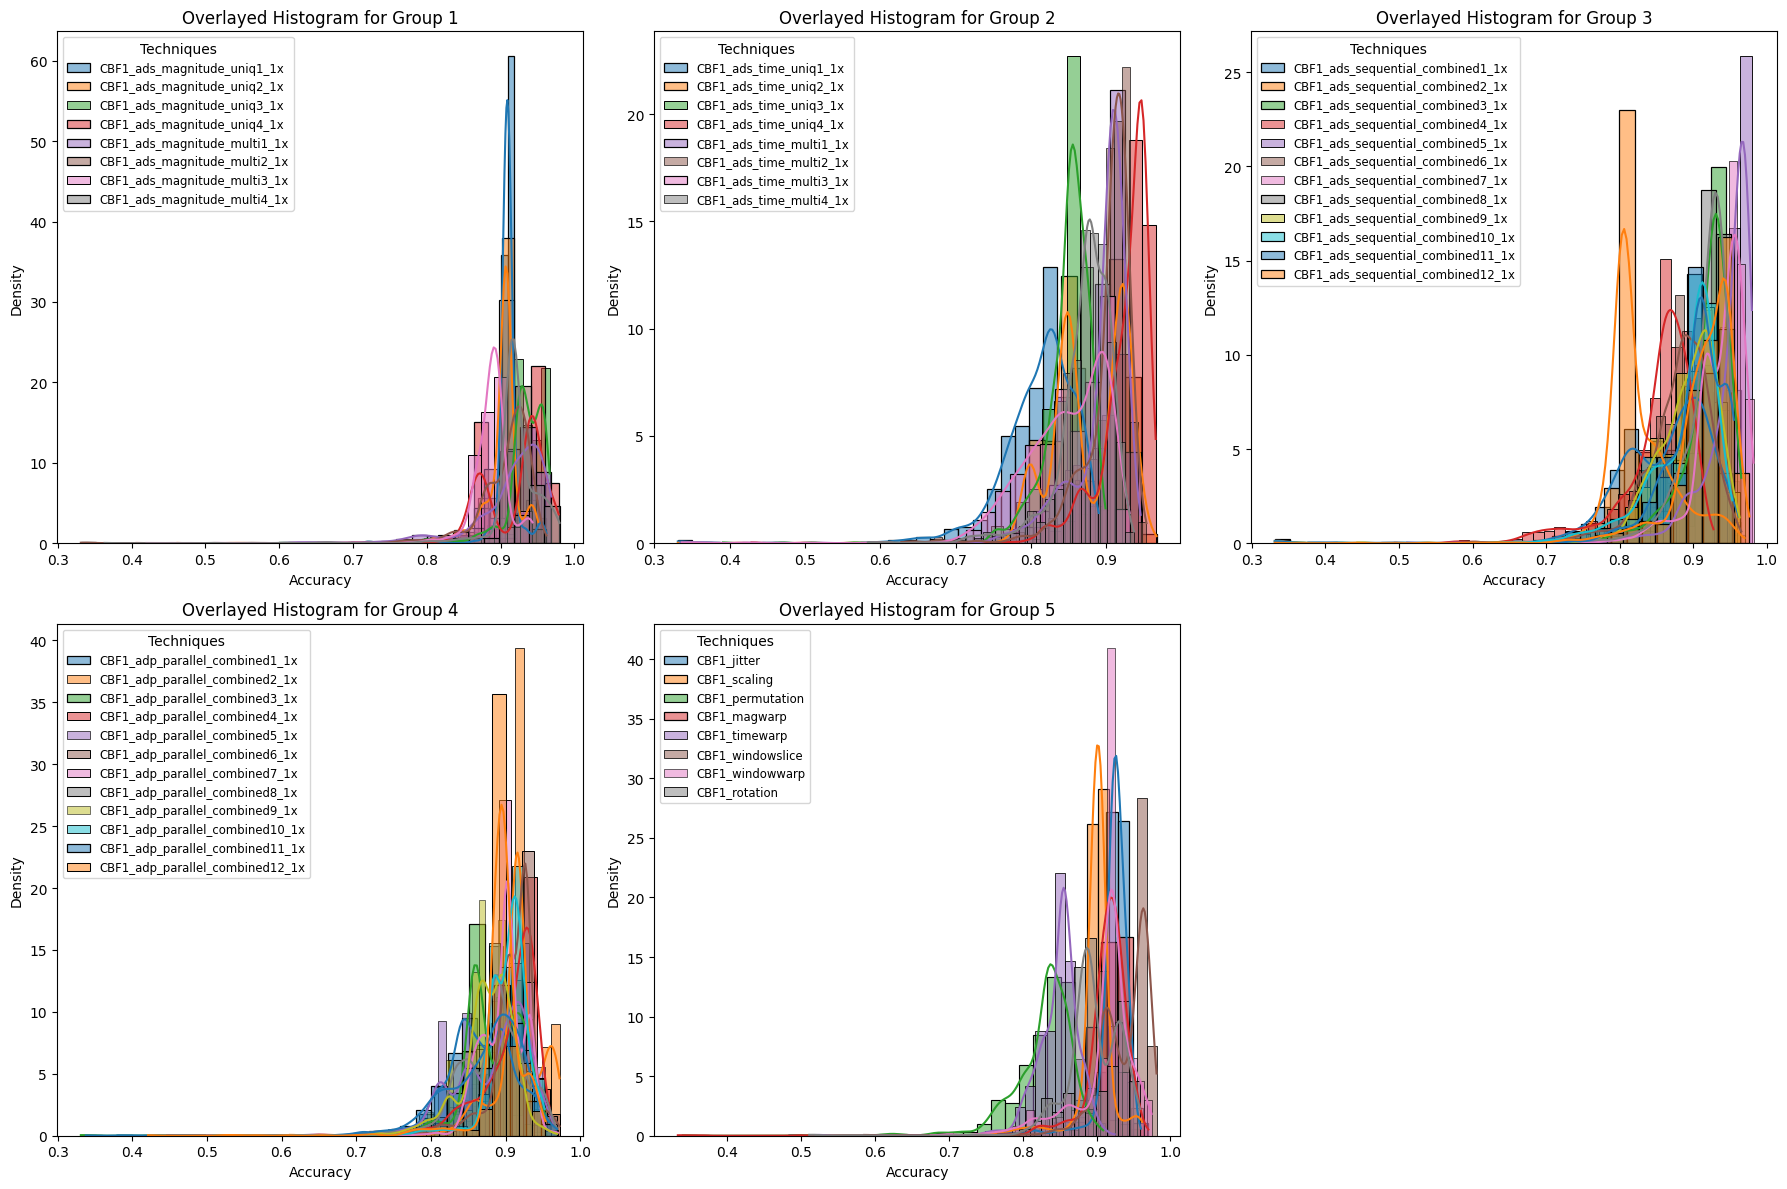

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constant path
base_path = "../output/cuda/fcnn/"

# Technique groups
techniques_groups = {
    'Group 1': [
        "CBF1_ads_magnitude_uniq1_1x", "CBF1_ads_magnitude_uniq2_1x", "CBF1_ads_magnitude_uniq3_1x", 
        "CBF1_ads_magnitude_uniq4_1x", "CBF1_ads_magnitude_multi1_1x", "CBF1_ads_magnitude_multi2_1x", 
        "CBF1_ads_magnitude_multi3_1x", "CBF1_ads_magnitude_multi4_1x"
    ],
    'Group 2': [
        "CBF1_ads_time_uniq1_1x", "CBF1_ads_time_uniq2_1x", "CBF1_ads_time_uniq3_1x", 
        "CBF1_ads_time_uniq4_1x", "CBF1_ads_time_multi1_1x", "CBF1_ads_time_multi2_1x", 
        "CBF1_ads_time_multi3_1x", "CBF1_ads_time_multi4_1x"
    ],
    'Group 3': [
        "CBF1_ads_sequential_combined1_1x", "CBF1_ads_sequential_combined2_1x", 
        "CBF1_ads_sequential_combined3_1x", "CBF1_ads_sequential_combined4_1x", 
        "CBF1_ads_sequential_combined5_1x", "CBF1_ads_sequential_combined6_1x", 
        "CBF1_ads_sequential_combined7_1x", "CBF1_ads_sequential_combined8_1x",
        "CBF1_ads_sequential_combined9_1x", "CBF1_ads_sequential_combined10_1x", 
        "CBF1_ads_sequential_combined11_1x", "CBF1_ads_sequential_combined12_1x"
    ],
    'Group 4': [
        "CBF1_adp_parallel_combined1_1x", "CBF1_adp_parallel_combined2_1x", 
        "CBF1_adp_parallel_combined3_1x", "CBF1_adp_parallel_combined4_1x", 
        "CBF1_adp_parallel_combined5_1x", "CBF1_adp_parallel_combined6_1x", 
        "CBF1_adp_parallel_combined7_1x", "CBF1_adp_parallel_combined8_1x", 
        "CBF1_adp_parallel_combined9_1x", "CBF1_adp_parallel_combined10_1x", 
        "CBF1_adp_parallel_combined11_1x", "CBF1_adp_parallel_combined12_1x"
    ],
    'Group 5': [
        "CBF1_jitter", "CBF1_scaling", "CBF1_permutation", "CBF1_magwarp", 
        "CBF1_timewarp", "CBF1_windowslice", "CBF1_windowwarp", "CBF1_rotation"
    ]
}

ucr_data = ["CBF", "ECG200", "ECG5000", "FordB", "GunPointAgeSpan", "Strawberry", "Yoga"]

# Set up the figure and axes for a 2x3 grid layout
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

# Loop through each group and create a histogram for each one
for idx, (group_name, techniques) in enumerate(techniques_groups.items()):
    ax = axs[idx]
    
    for dataset in ucr_data:
        for technique in techniques:
            # Constructing the path for each technique and dataset
            file_path = os.path.join(base_path, dataset, "1", f"{technique}_accuracies.npy")
            
            # Check if the file exists
            if os.path.exists(file_path):
                accuracies = np.load(file_path, allow_pickle=True)
                
                # Plot histogram
                sns.histplot(accuracies, kde=True, stat="density", label=f"{technique}", bins=30, alpha=0.5, ax=ax)
    
    # Set title and labels for each subplot
    ax.set_title(f"Overlayed Histogram for {group_name}")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Density")
    ax.legend(title="Techniques", fontsize='small')

# Remove the last empty subplot if there are fewer than 6 groups
if len(techniques_groups) < len(axs):
    fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()


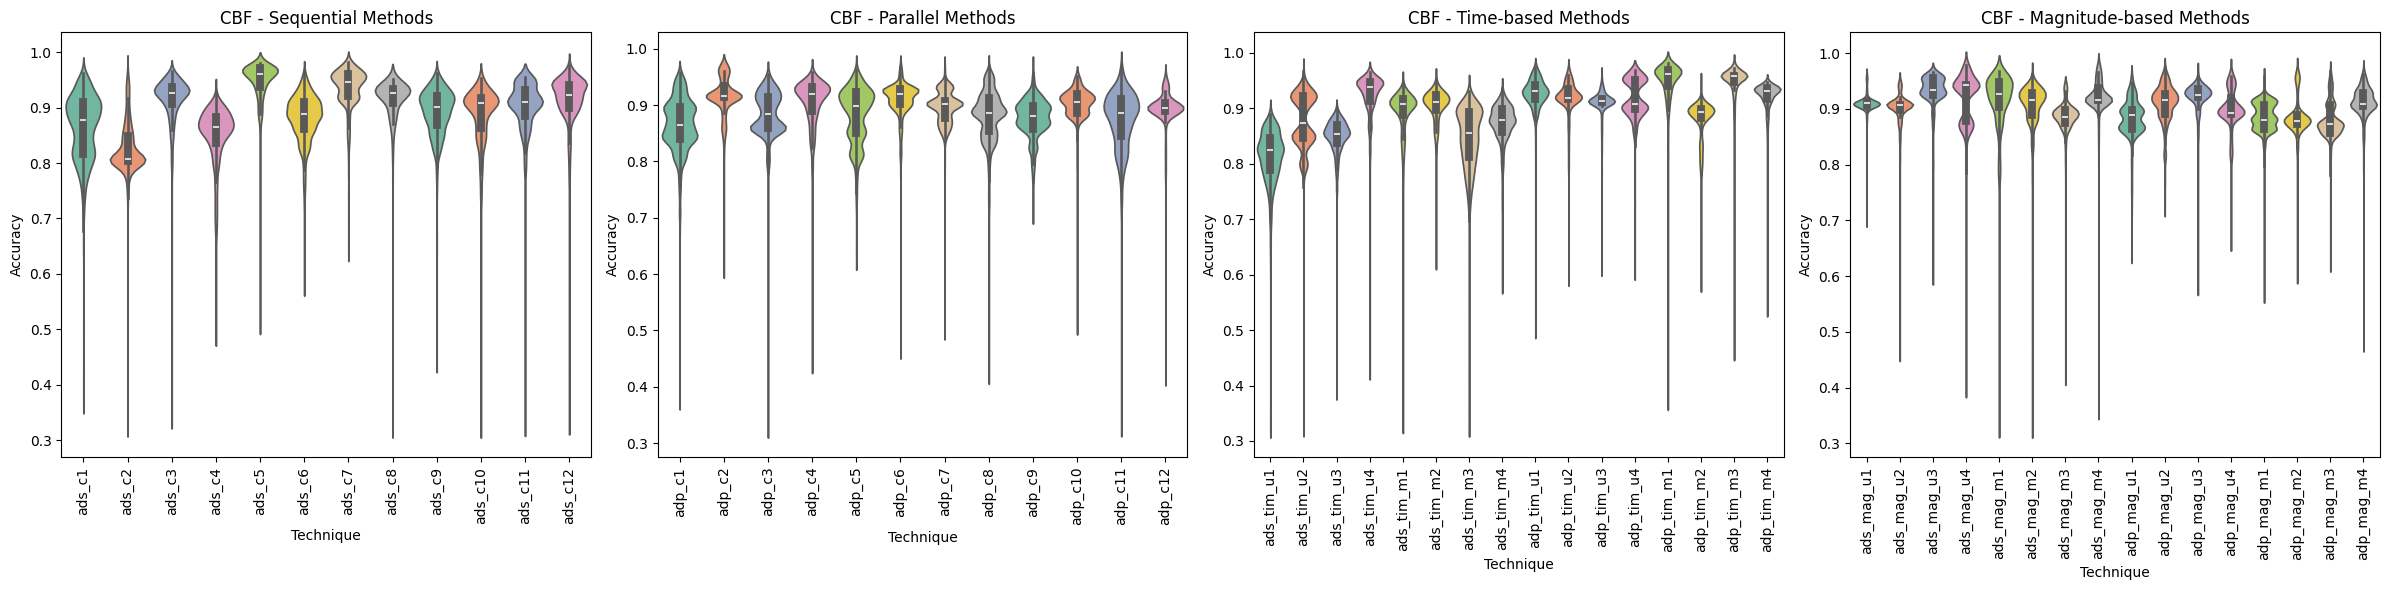

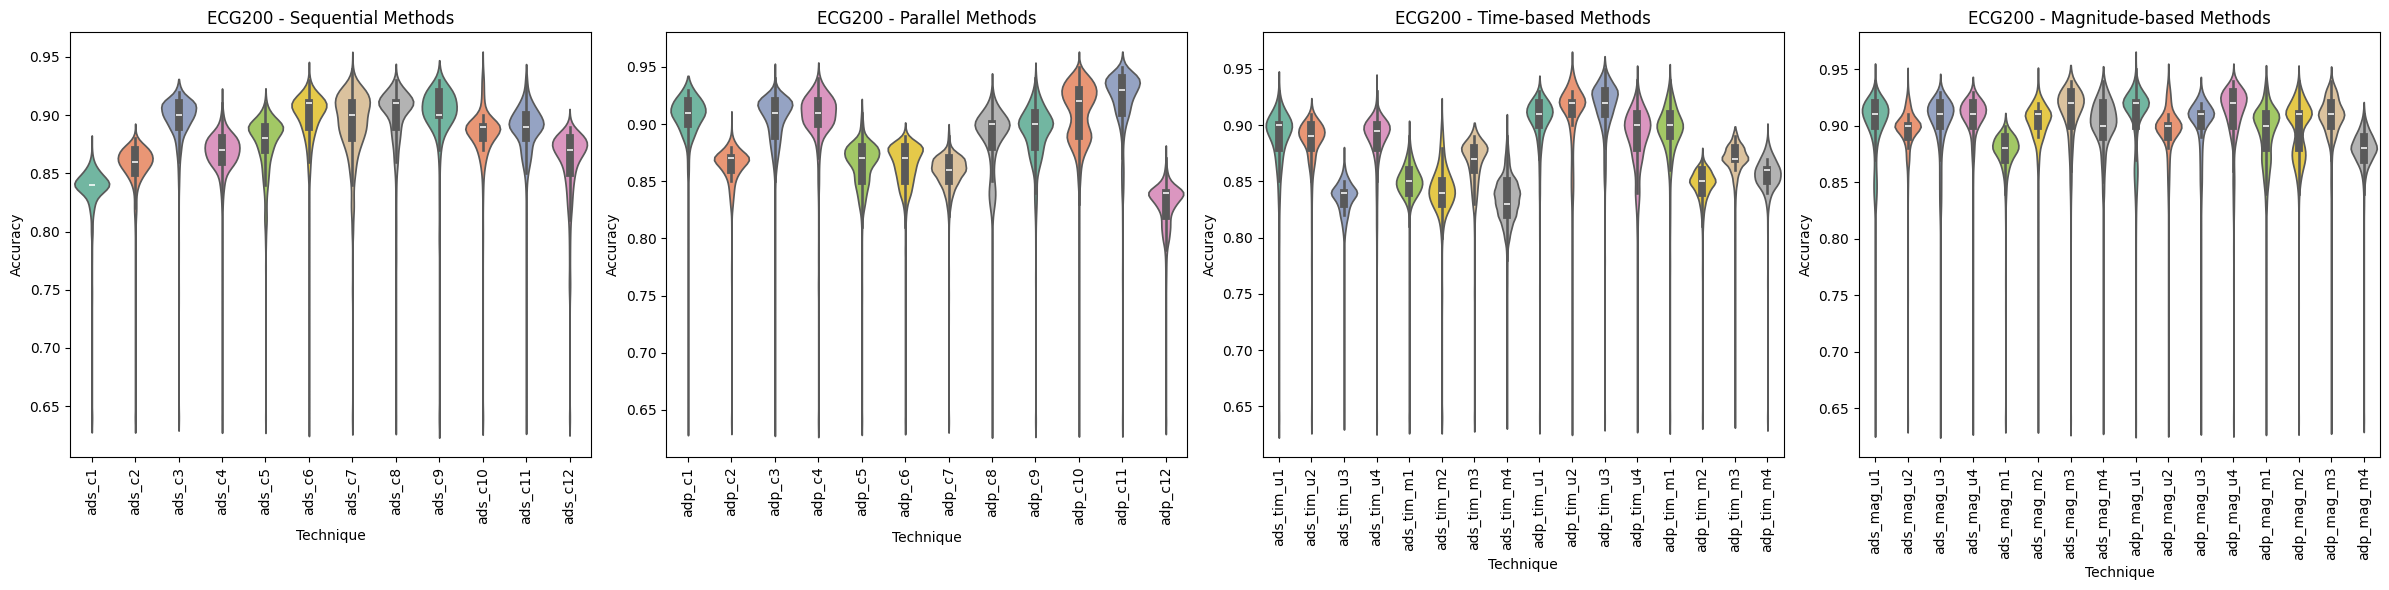

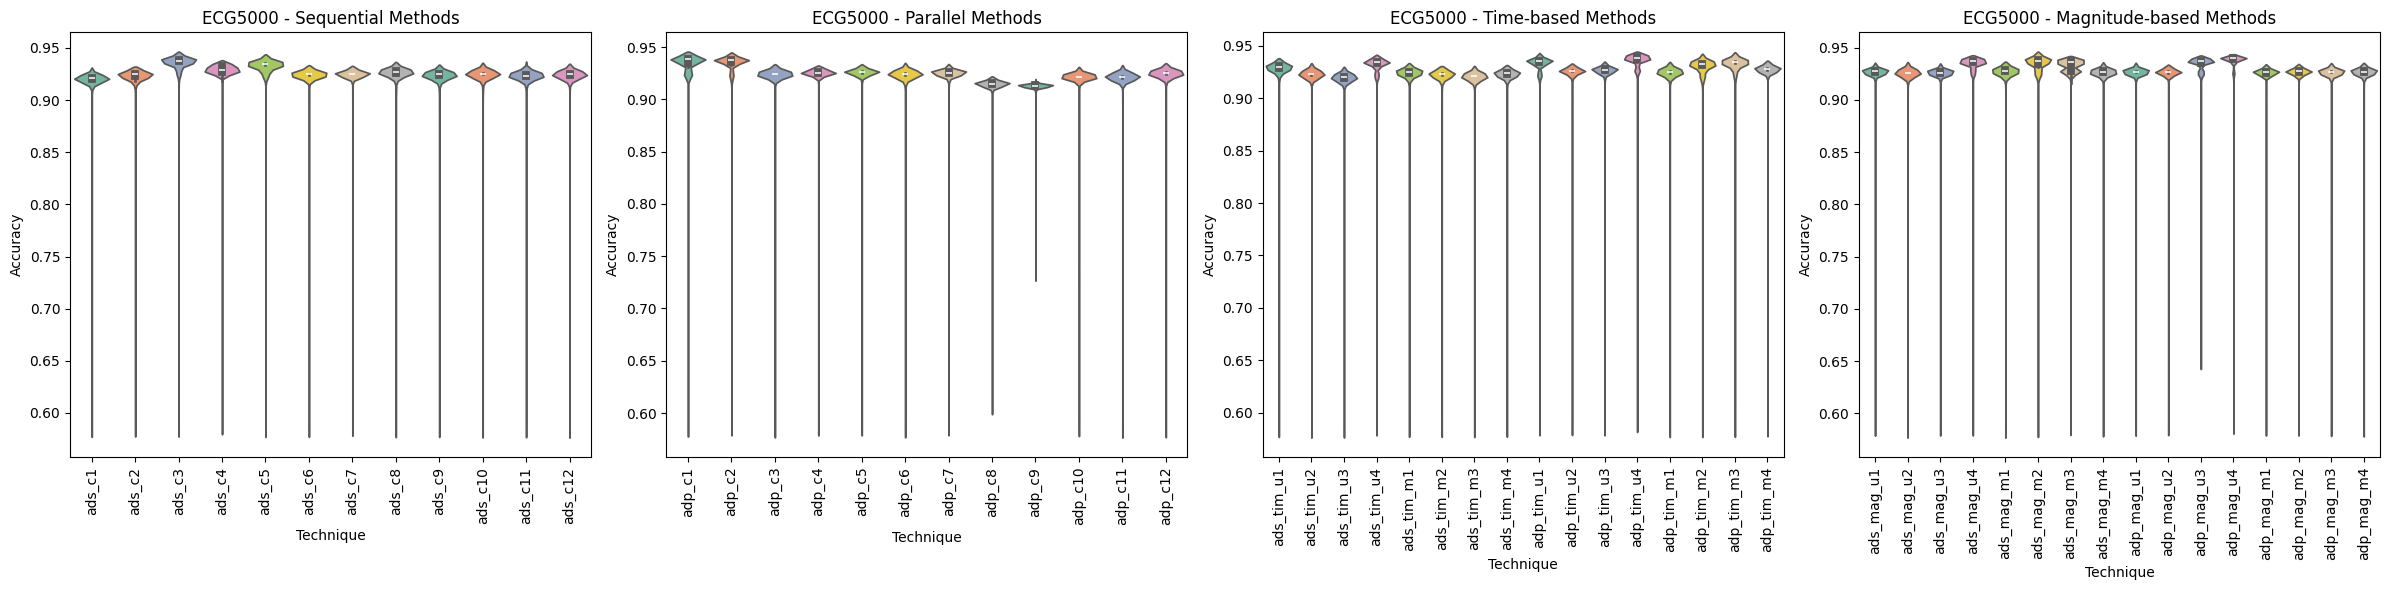

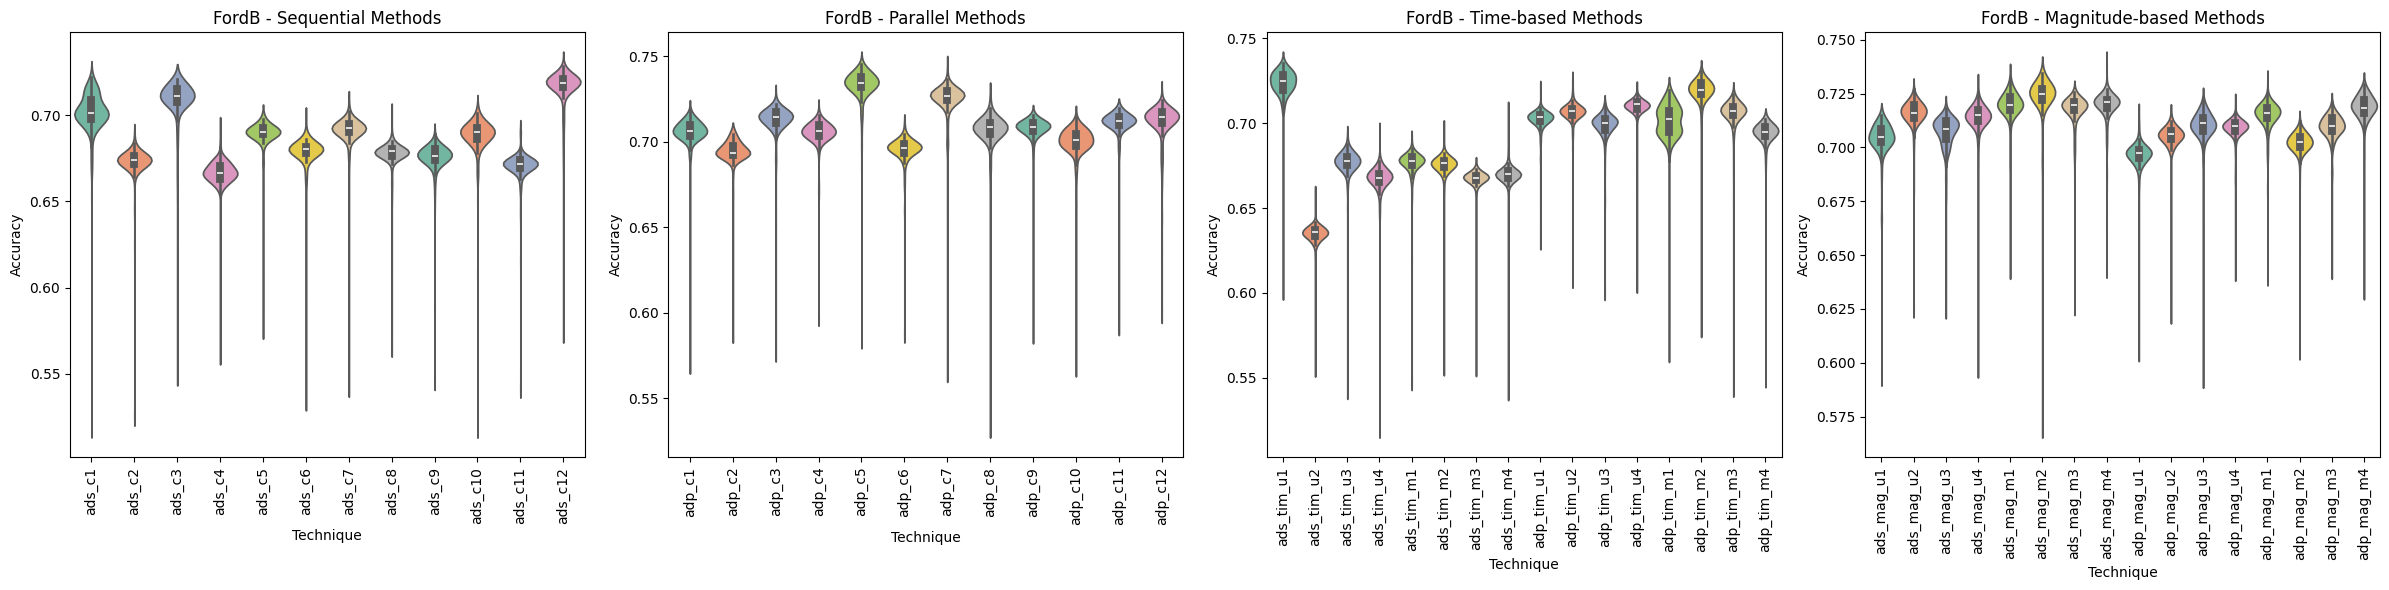

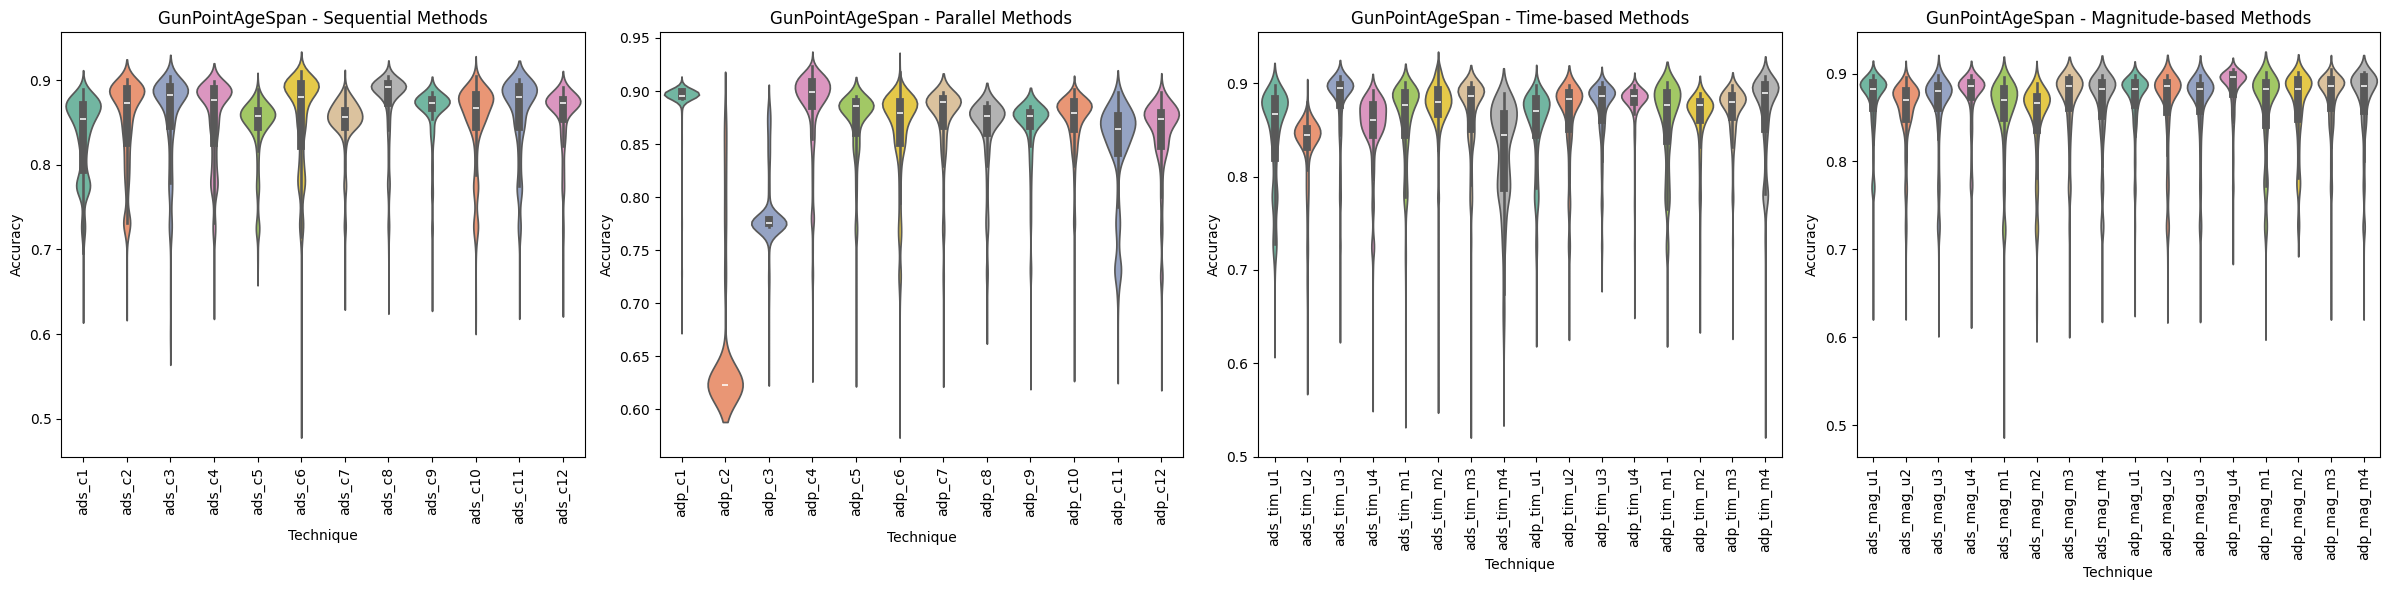

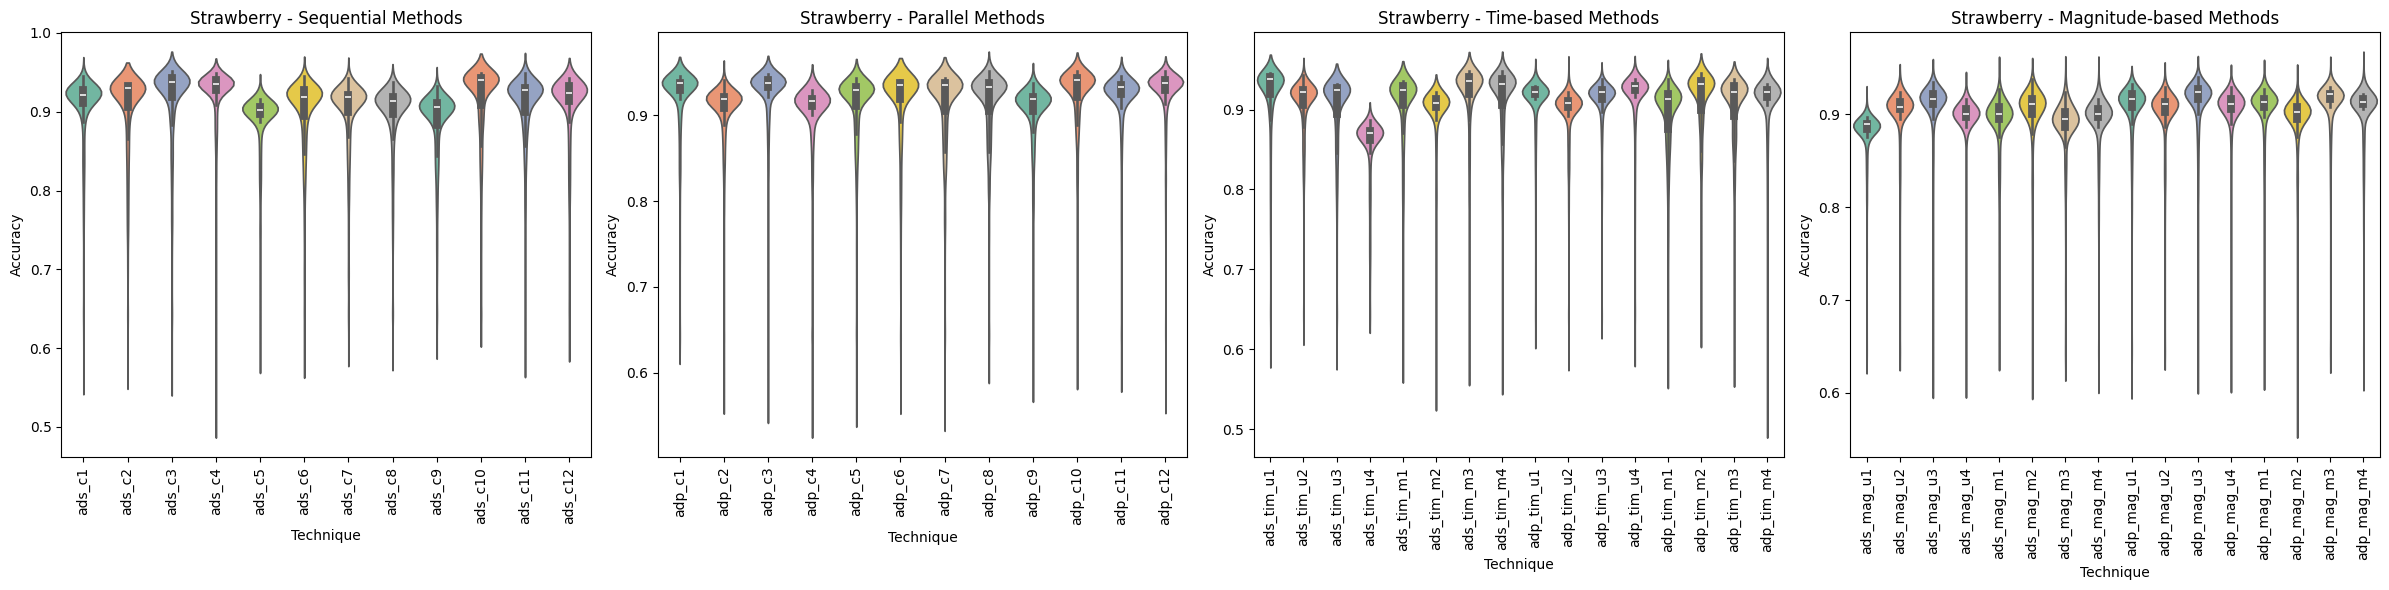

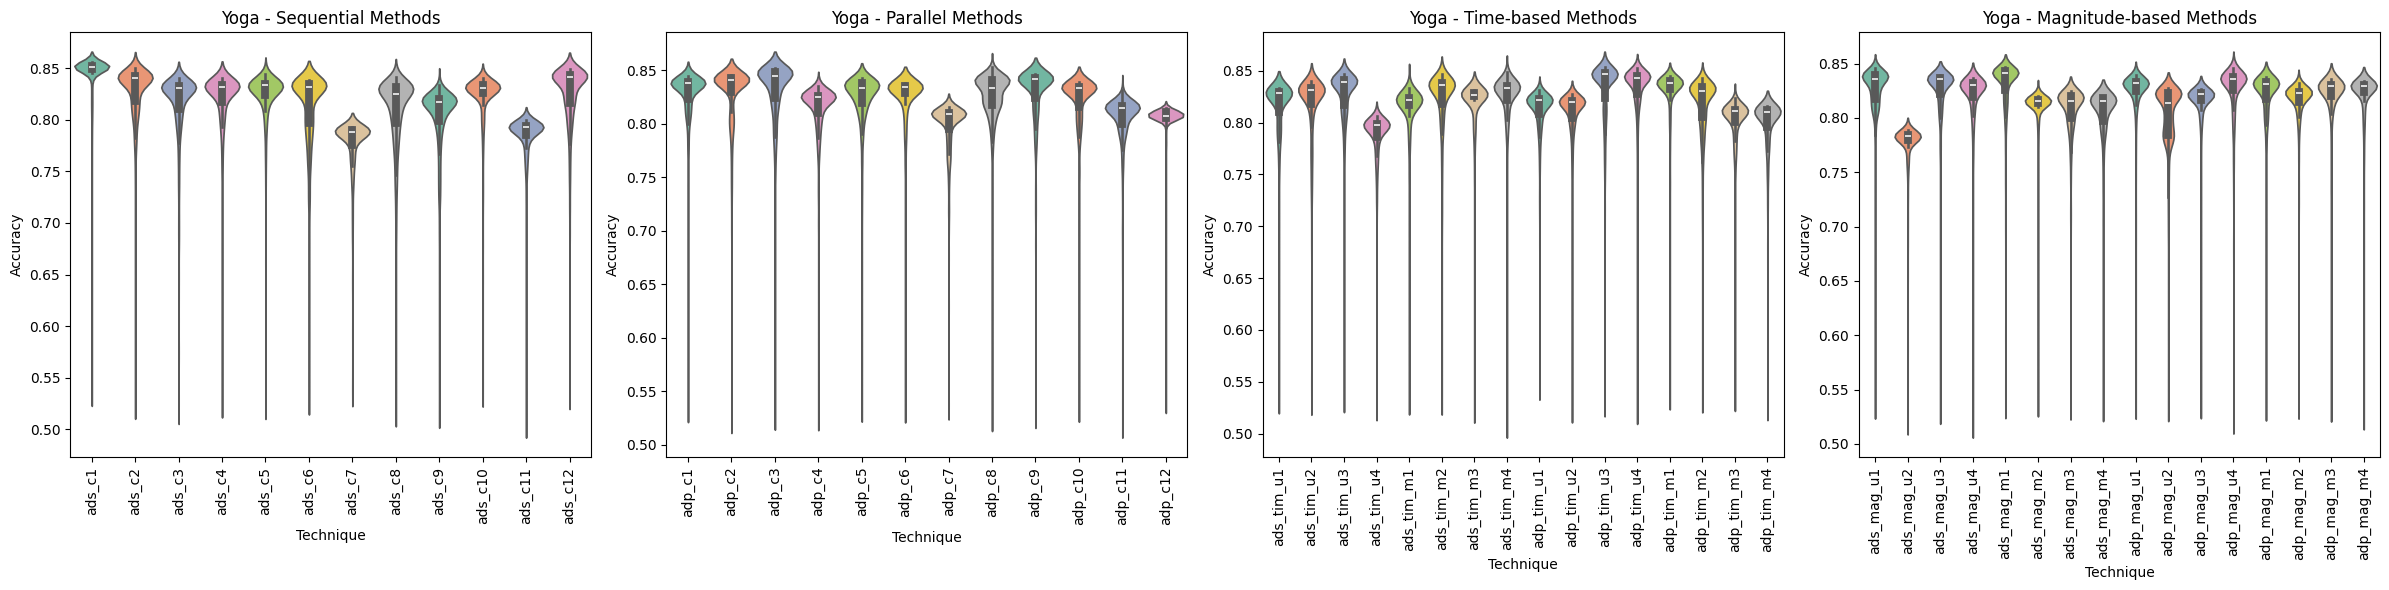

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append(os.path.abspath(".."))

from utils.constant import technique_abbreviations as ta

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Constant path
base_path = "../output/cuda/fcnn/"

# Updated Technique Groups with original names
techniques_groups = {
    'Sequential Methods': [
        "ads_sequential_combined1_1x", "ads_sequential_combined2_1x",
        "ads_sequential_combined3_1x", "ads_sequential_combined4_1x",
        "ads_sequential_combined5_1x", "ads_sequential_combined6_1x",
        "ads_sequential_combined7_1x", "ads_sequential_combined8_1x",
        "ads_sequential_combined9_1x", "ads_sequential_combined10_1x",
        "ads_sequential_combined11_1x", "ads_sequential_combined12_1x"
    ],
    'Parallel Methods': [
        "adp_parallel_combined1_1x", "adp_parallel_combined2_1x",
        "adp_parallel_combined3_1x", "adp_parallel_combined4_1x",
        "adp_parallel_combined5_1x", "adp_parallel_combined6_1x",
        "adp_parallel_combined7_1x", "adp_parallel_combined8_1x",
        "adp_parallel_combined9_1x", "adp_parallel_combined10_1x",
        "adp_parallel_combined11_1x", "adp_parallel_combined12_1x"
    ],
    'Time-based Methods': [
        "ads_time_uniq1_1x", "ads_time_uniq2_1x", 
        "ads_time_uniq3_1x", "ads_time_uniq4_1x", 
        "ads_time_multi1_1x", "ads_time_multi2_1x", 
        "ads_time_multi3_1x", "ads_time_multi4_1x",
        "adp_time_uniq1_1x", "adp_time_uniq2_1x", 
        "adp_time_uniq3_1x", "adp_time_uniq4_1x", 
        "adp_time_multi1_1x", "adp_time_multi2_1x", 
        "adp_time_multi3_1x", "adp_time_multi4_1x"
    ],
    'Magnitude-based Methods': [
        "ads_magnitude_uniq1_1x", "ads_magnitude_uniq2_1x", 
        "ads_magnitude_uniq3_1x", "ads_magnitude_uniq4_1x", 
        "ads_magnitude_multi1_1x", "ads_magnitude_multi2_1x", 
        "ads_magnitude_multi3_1x", "ads_magnitude_multi4_1x",
        "adp_magnitude_uniq1_1x", "adp_magnitude_uniq2_1x", 
        "adp_magnitude_uniq3_1x", "adp_magnitude_uniq4_1x", 
        "adp_magnitude_multi1_1x", "adp_magnitude_multi2_1x", 
        "adp_magnitude_multi3_1x", "adp_magnitude_multi4_1x"
    ]
}

# List of datasets
ucr_data = ["CBF", "ECG200", "ECG5000", "FordB", "GunPointAgeSpan", "Strawberry", "Yoga"]

# Prepare data for the plot
plot_data = []

for dataset in ucr_data:
    for group_name, techniques in techniques_groups.items():
        for technique in techniques:
            # Apply the abbreviation mapping from constant.py
            abbreviated_technique = ta.get(technique, technique)
            
            # Construct the path for each technique and dataset
            file_path = os.path.join(base_path, dataset, "1", f"{dataset}1_{technique}_accuracies.npy")
            
            # Check if the file exists
            if os.path.exists(file_path):
                accuracies = np.load(file_path, allow_pickle=True)
                for accuracy in accuracies:
                    plot_data.append({
                        'Dataset': dataset,
                        'Group': group_name,
                        'Technique': abbreviated_technique,
                        'Accuracy': accuracy
                    })

# Create a DataFrame from the plot data
df = pd.DataFrame(plot_data)

# Plotting 2x3 grids for each dataset
for dataset in ucr_data:
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    axs = axs.flatten()
    
    for idx, (group_name, _) in enumerate(techniques_groups.items()):
        ax = axs[idx]
        group_data = df[(df['Dataset'] == dataset) & (df['Group'] == group_name)]
        sns.violinplot(x='Technique', y='Accuracy', data=group_data, ax=ax, palette='Set2')
        
        # Set title and labels for each subplot
        ax.set_title(f"{dataset} - {group_name}")
        ax.set_xlabel("Technique")
        ax.set_ylabel("Accuracy")
        ax.tick_params(axis='x', rotation=90)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Load constants from constant.py
sys.path.append(os.path.abspath(".."))
from utils.constant import technique_abbreviations as ta, techniques_groups as tg, ucr_data

# Constant path
base_path = "../output/cuda/fcnn/"
plot_base_path = "plots/"

# Ensure the plots directory exists
if not os.path.exists(plot_base_path):
    os.makedirs(plot_base_path)

# Prepare data for the plot
plot_data = []

for dataset in ucr_data:
    for group_name, techniques in tg.items():
        for technique in techniques:
            # Apply the abbreviation mapping from constant.py
            abbreviated_technique = ta.get(technique, technique)
            
            # Construct the path for each technique and dataset
            file_path = os.path.join(base_path, dataset, "1", f"{dataset}1_{technique}_accuracies.npy")
            
            # Check if the file exists
            if os.path.exists(file_path):
                accuracies = np.load(file_path, allow_pickle=True)
                for accuracy in accuracies:
                    plot_data.append({
                        'Dataset': dataset,
                        'Group': group_name,
                        'Technique': abbreviated_technique,
                        'Accuracy': accuracy
                    })

# Create a DataFrame from the plot data
df = pd.DataFrame(plot_data)

# Plotting and saving images for each dataset and group
for dataset in ucr_data:
    for group_name in tg.keys():
        plt.figure(figsize=(12, 6))
        group_data = df[(df['Dataset'] == dataset) & (df['Group'] == group_name)]
        
        sns.violinplot(x='Technique', y='Accuracy', data=group_data, palette='Set2')
        plt.title(f"{dataset} - {group_name}")
        plt.xlabel("Technique")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        
        # Save the plot
        group_name_image_path = os.path.join(plot_base_path, f"{dataset}1_{group_name}_violin.png")
        plt.tight_layout()
        plt.savefig(group_name_image_path)
        plt.close()

